In [2]:
#import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


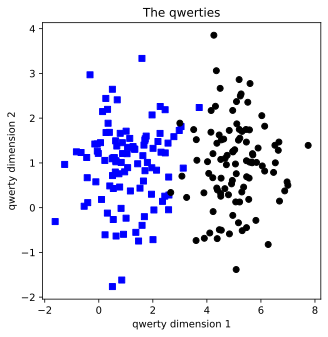

In [6]:
#Create data

nPerClust = 100
blur = 1

A = [ 1, 1]
B = [ 5, 1]

#generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))


#concatenate into a matrix
data_np = np.hstack((a,b)).T

#convert to pytorch tensor

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [7]:
#Build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
#Other model features
learningRate = .01

#loss function
lossfun = nn.BCELoss() #Binary Cross Entropy Loss Function

#optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)